In [133]:
import os
import numpy as np
#from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
#import random
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

In [158]:
INPUT_DATA_FOLDER = "../output/datasets/"
folders = [1,5] # numbers of datasets (classes) to do prediction on


# Classification supervisée

# zigzag coefficients
def coef_dct(folder):
    img_blocks = os.listdir(folder)
    dct_blocks = [np.load(folder+img_block) for img_block in img_blocks if img_block.endswith('.npy')]
    avg_dct = np.mean(np.array(dct_blocks), axis=1)
    for x in avg_dct:
        x[0][0]=0
    avg_dct = [np.concatenate([np.diagonal(x[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1-x.shape[0], x.shape[0])]) for x in avg_dct]
    return avg_dct


In [159]:
def train_df(input_folder, nb_dataset):
    df = pd.DataFrame()
    for i in nb_dataset:
        dct_ = coef_dct(input_folder+str(i)+"/")
        df = df.append([[list(x),i] for x in dct_ ])
    df = df.reset_index(drop=True)
    df = df.rename(columns={0:'average_dct', 1:'class'})
    return df

df = train_df(INPUT_DATA_FOLDER, folders)

In [148]:
# Random Forest Classifier
X = np.array([x for x in df['average_dct']])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
print("score", rfc.score(X_test, y_test))
print("prediction", rfc.predict(X_test))
print(y_test)
plot_confusion_matrix(rfc, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

RandomForestClassifier(max_depth=2, random_state=0)

score 0.9418604651162791
prediction [5 1 5 1 5 1 5 5 1 5 1 1 1 1 5 5 1 1 5 1 5 1 1 5 1 1 1 5 5 1 5 5 5 1 1 1 1
 5 1 1 5 1 1 5 1 5 5 1 5 1 5 5 1 5 5 1 5 5 1 1 1 1 1 1 1 1 5 5 1 5 1 5 5 1
 5 1 5 1 1 5 1 1 5 5 1 1]
240    5
29     1
269    5
79     1
210    5
      ..
66     1
190    5
156    5
127    1
124    1
Name: class, Length: 86, dtype: int64


c:\users\shiti\documents\m2\uv2_projet\projet_py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


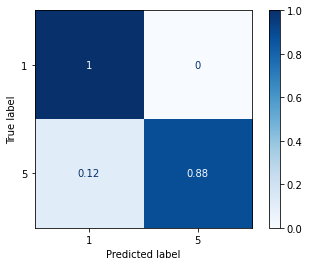

In [150]:
# SVM
X = np.array([x for x in df['average_dct']])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X, y)
print("score", svm.score(X_test, y_test))
print("prediction", svm.predict(X_test))
print(y_test)
plot_confusion_matrix(svm, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

In [161]:
# Résultats moins bons avec le perceptron : 0.70 pour les classes 1 et 2, 0.40 pour les classes 1 et 5

#from sklearn.linear_model import Perceptron

#X = np.array([x for x in df['average_dct']])
#y = df['class']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
#pct = Perceptron(tol=1e-3, random_state=0)
#pct.fit(X_train, y_train)
#print("score", pct.score(X_test, y_test))

score 0.7093023255813954
